In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

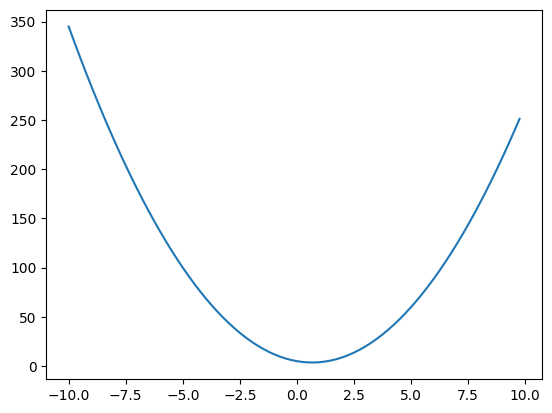

In [2]:
%matplotlib inline

def f(x):
  return 3*x**2 - 4*x + 5

xs = np.arange(-10, 10, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [3]:
x = 0
h = 0.01

for x in range(10):
    pass
    print(f"x = {x} ,f(x)  \t->{f(x)/h}")
    print(f"x = {x+h} f(x+h)->{f(x+h)/h}")
    print("-------------------")

x = 0 ,f(x)  	->500.0
x = 0.01 f(x+h)->496.03000000000003
-------------------
x = 1 ,f(x)  	->400.0
x = 1.01 f(x+h)->402.03
-------------------
x = 2 ,f(x)  	->900.0
x = 2.01 f(x+h)->908.0299999999997
-------------------
x = 3 ,f(x)  	->2000.0
x = 3.01 f(x+h)->2014.0299999999995
-------------------
x = 4 ,f(x)  	->3700.0
x = 4.01 f(x+h)->3720.0299999999993
-------------------
x = 5 ,f(x)  	->6000.0
x = 5.01 f(x+h)->6026.029999999999
-------------------
x = 6 ,f(x)  	->8900.0
x = 6.01 f(x+h)->8932.03
-------------------
x = 7 ,f(x)  	->12400.0
x = 7.01 f(x+h)->12438.03
-------------------
x = 8 ,f(x)  	->16500.0
x = 8.01 f(x+h)->16544.03
-------------------
x = 9 ,f(x)  	->21200.0
x = 9.01 f(x+h)->21250.03
-------------------


In [4]:
class Value:

    def __init__(self, data, _children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*')
        return out

a = Value(2,label='a')
b = Value(-3,label='b')
c = Value(10,label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2 ,label='f')
L = d * f; L.label='L'
print(L)

Value(data=-8)


In [5]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
        
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to righ
    nodes, edges = trace(root)
    
    for n in nodes:
        
        uid = str(id(n))
        
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
        
        if n._op:
            
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot



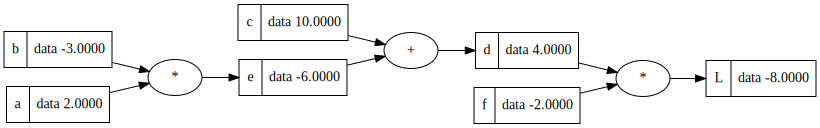

In [8]:
draw_dot(L)
